In [44]:
import numpy as np
import time
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [45]:
#Fake dataset (can be changed or use real dataset instead)
X, y = make_classification(n_samples=1000, n_features=100, n_informative=50, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
#Initialise lists to be used to analyze results
new_col_range = list(range(5, 101, 5))
accuracy_list = []
computational_cost_list = []

In [47]:
#Loop to colelct data for every 5 cols reduced 
for n_components in new_col_range:
    accuracies = []
    computational_costs = []
    for i in range(10):
        # Start timer
        start_time = time.time()

        #every 5 cols
        pca = PCA(n_components=n_components, svd_solver='randomized', random_state=42)
        X_train_reduced = pca.fit_transform(X_train)
        X_test_reduced = pca.transform(X_test)

        #Train a RandomForestClassifier on the reduced data
        mod = RandomForestClassifier(random_state=42)
        mod.fit(X_train_reduced, y_train)
        y_pred = mod.predict(X_test_reduced)
        accuracy = accuracy_score(y_test, y_pred)
        end_time = time.time()
        computational_cost = end_time - start_time
        accuracies.append(accuracy)
        computational_costs.append(computational_cost)

    # Store results

    accuracy_list.append(np.mean(accuracies))
    computational_cost_list.append(np.mean(computational_costs))


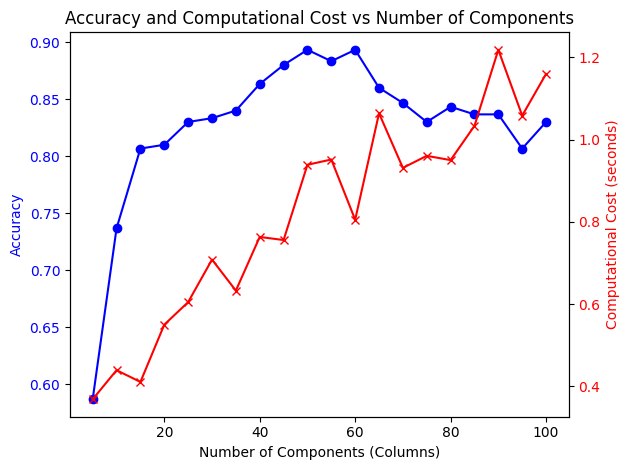

In [48]:
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the accuracy on the primary y-axis
ax1.plot(new_col_range, accuracy_list, 'b-', label='Accuracy', marker='o')
ax1.set_xlabel('Number of Components (Columns)')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for computational cost
ax2 = ax1.twinx()
ax2.plot(new_col_range, computational_cost_list, 'r-', label='Computational Cost', marker='x')
ax2.set_ylabel('Computational Cost (seconds)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and show the plot
plt.title('Accuracy and Computational Cost vs Number of Components')
fig.tight_layout()
plt.show()

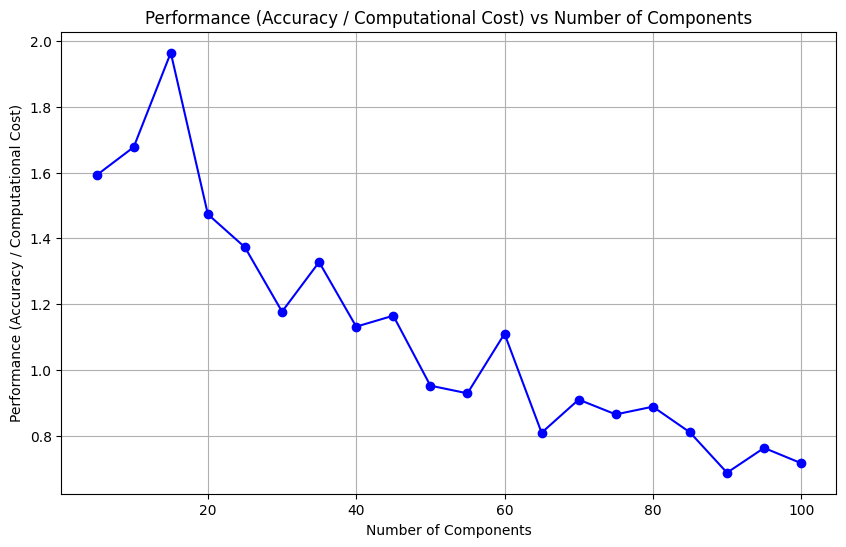

In [49]:
#Finding the optimal dimension (different depending on the nature of dataset)
performance_ratios = np.array(accuracy_list) / np.array(computational_cost_list)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(new_col_range, performance_ratios, marker='o', linestyle='-', color='b')

plt.title("Performance (Accuracy / Computational Cost) vs Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Performance (Accuracy / Computational Cost)")
plt.grid(True)
plt.show()